In [2]:
# matplotlib과 관련된 모듈을 미리 선언
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
# rc('font', family = 'AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np

# 결정트리 내용 정리
- entropy 내지는 genie로 정의되는 정보량을 최대로 감소시키는, 데이터를 최대한 정렬시키는 경계값을 찾는 과정
- 

# iris 예제로 보는 결정트리

In [4]:
# 데이터 준비
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# input, target data 지정
iris_data = load_iris()
X = iris_data.data 
y = iris_data.target


# 시각화를 위해서 특성 2개만을 사용하자. 
# 0, 1, 칼럼만 사용하고 target으로 층화해 샘플분할, default 0.25
X_train, X_test, y_train, y_test = train_test_split(iris_data.data[:,:2], iris_data.target,
                                                    stratify = iris_data.target,
                                                    shuffle = True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

In [5]:
# decision tree 모듈 불러오기
# Classifier와 Regressor는 정보이론과 MSE등 경계값 찾는방법이 다르다.
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=4,
                                  random_state=0).fit(X_train,y_train)

In [7]:
#학습데이터와 테스트데이터의 스코어 확인
print('train score : {:.3f}'.format(model_dt.score(X_train,y_train)))
# fit한 모델의 score를 유효숫자 세자리 표현
print('test score : {:.3f}'.format(model_dt.score(X_test,y_test)))

train score : 0.839
test score : 0.789


In [8]:
# 트리 시각화: graphviz를 이용
from sklearn.tree import export_graphviz
export_graphviz(model_dt,out_file='tree1.dot',class_names=iris_data.target_names,
                feature_names=iris_data.feature_names[:2],filled=True)

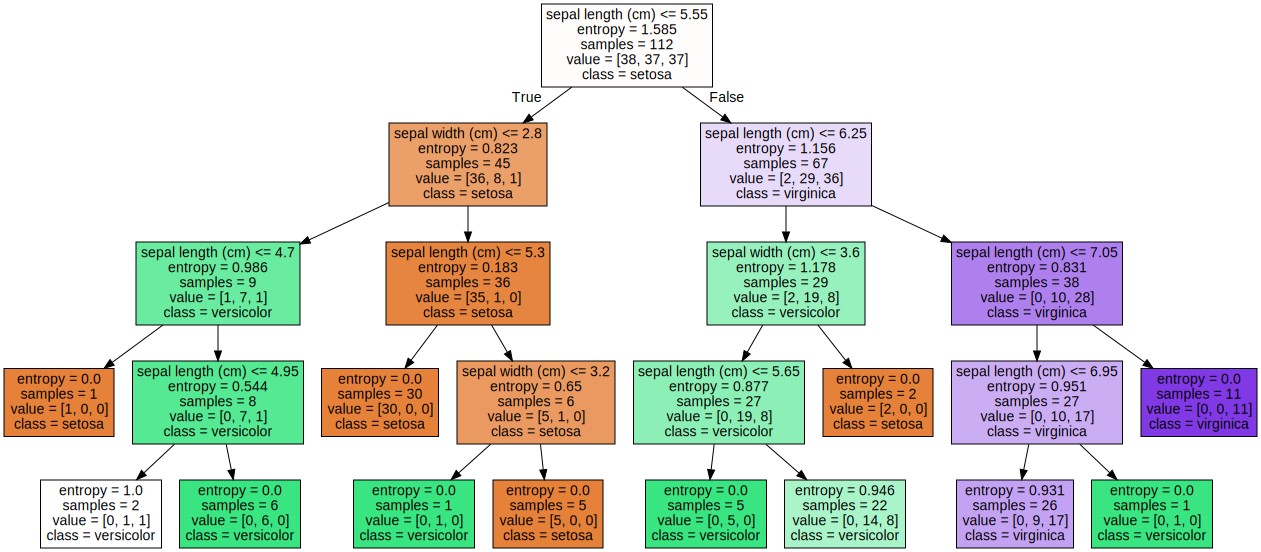

In [9]:
import graphviz
with open('tree1.dot') as f:
    dot_graph = f.read() # w저장한 파일 읽어오기
display(graphviz.Source(dot_graph)) # 읽은 파일을 표시